<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Top-Model-Regression-Modeling/blob/main/regressionModeling_deepNet_RDKitFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. RDKit Feature Based Regression Modelling

## Introduction

Rdkit Features: RDKiT descriptor are easy to calculate descriptors open-sourced under rdkit.Chem.Descriptor modules by RDKit (Rdkit.Chem.Descriptors Module, 2024). Check out documentation here:  [Rdkit Descriptor Module](https://rdkit.org/docs/source/rdkit.Chem.Descriptors.html)

## Data loading and Preprocessing



In [1]:
# For Reporducibility
import numpy as np
np.random.seed(42)


In [2]:
# Mount Drive in Colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data loading

In [3]:
# Load dataset
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/Part_2_standarizationOfMolecule/StandarizedSmiles_cutOFF800daltonMolecularweight.xlsx')
df.head(5)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [4]:
# Calculating negative pIC50
df['pIC50']=np.log10(df['IC50'])

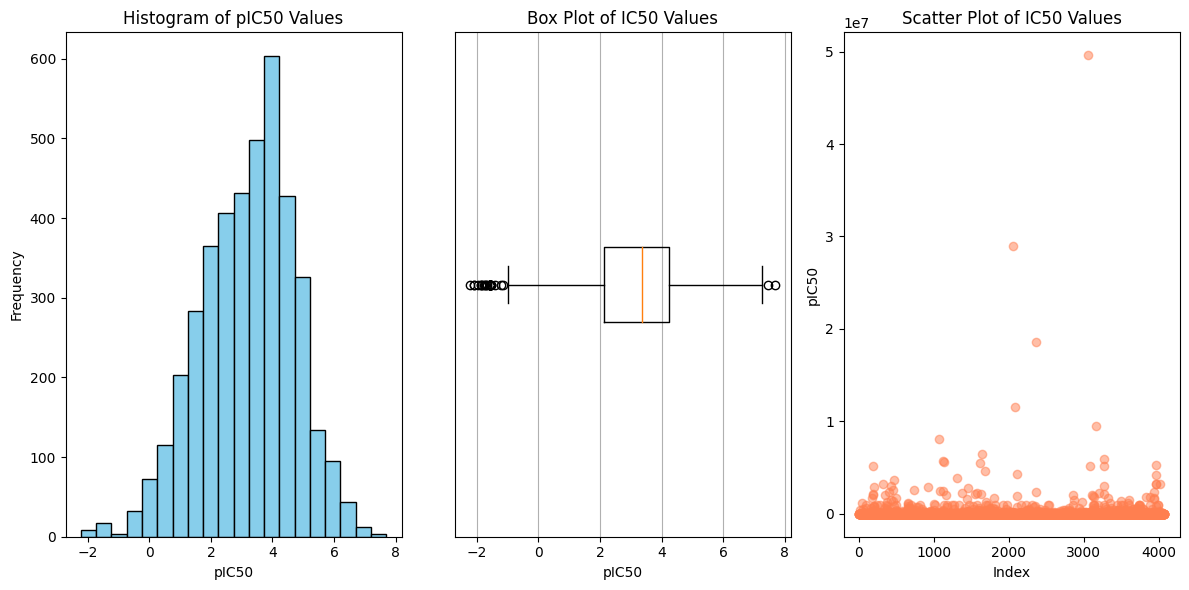

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#  Plot histogram, box plot, and scatter plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df['pIC50'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of pIC50 Values')
plt.xlabel('pIC50')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(df['pIC50'], vert=False)
plt.title('Box Plot of IC50 Values')
plt.xlabel('pIC50')
plt.yticks([])
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df['IC50'], color='coral', alpha=0.5)
plt.title('Scatter Plot of IC50 Values')
plt.xlabel('Index')
plt.ylabel('pIC50')

plt.tight_layout()
plt.show()

# Statistical Methods: Z-score
z_scores = np.abs(stats.zscore(df['pIC50']))
z_threshold = 3
outliers_zscore = df.loc[z_scores > z_threshold, 'pIC50']

# Interquartile Range (IQR)
Q1 = df['pIC50'].quantile(0.25)
Q3 = df['pIC50'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_iqr = df[(df['pIC50'] < lower_bound_iqr) | (df['pIC50'] > upper_bound_iqr)]['pIC50']

# Tukey's fences
lower_fence_tukey = Q1 - 1.5 * IQR
upper_fence_tukey = Q3 + 1.5 * IQR
outliers_tukey = df[(df['pIC50'] < lower_fence_tukey) | (df['pIC50'] > upper_fence_tukey)]['pIC50']

In [6]:
# Installing RDKit from PyPI
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 39.4 MB/s eta 0:00:00


### Descriptor generation
Two feature sets were created: one underwent LASSO treatment, which was employed in classical, ensemble, and deep learning models. The other set, devoid of LASSO treatment, was utilized in the AutoML method, as it incorporates its own feature processing and selection methodology within its pipeline.





The code for descriptor calculation was adopted form blogpost by [@greglandrum](https://https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html)

In [7]:
# Importing pandas as pd
import pandas as pd

# Importing required modules from RDKit
from rdkit import Chem
from rdkit.Chem import Descriptors

# Define a function to calculate the full list of descriptors for a molecule
def calculate_molecular_descriptors(molecule, missing_value=None):
    # Initialize an empty dictionary to store descriptor values
    result = {}

    # Iterate through the descriptor list and calculate descriptors for the molecule
    for name, function in Descriptors._descList:
        try:
            # Calculate descriptor value for the molecule
            value = function(molecule)
        except:
            # Print the error message
            import traceback
            traceback.print_exc()
            # Set the descriptor value to the specified missing value
            value = missing_value
        # Store the descriptor value in the result dictionary
        result[name] = value
    return result

# Define a list to store the computed descriptors for each molecule
descriptor_list = []

# Iterate through the SMILES column and calculate descriptors for each molecule
for smiles_string in df['cleanedMol']:
    # Convert SMILES string to RDKit molecule object
    molecule = Chem.MolFromSmiles(smiles_string)

    # Check if the molecule is valid
    if molecule is not None:
        # Calculate descriptors using the calculate_molecular_descriptors function
        descriptors = calculate_molecular_descriptors(molecule, missing_value=None)

        # Add the descriptors to the list
        descriptor_list.append(descriptors)
    else:
        # Handle invalid or missing molecules if needed
        descriptor_list.append({})

# Convert the list of descriptors to a pandas DataFrame
descriptor_df = pd.DataFrame(descriptor_list)

# Merge the original DataFrame with the descriptor DataFrame
df = pd.concat([df, descriptor_df], axis=1)

In [8]:
# Drop any feature containing null values
df.dropna(axis=1)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,...,0,0,0,0,0,0,0,0,0,0
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,...,0,0,0,0,0,0,0,0,0,0
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,...,0,0,0,0,0,0,0,0,0,0
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Feature Set for best modelling
feature1=df.iloc[:, 16:]

In [10]:
# Get the list of columns containing NaN values
columns_with_nan = feature1.columns[feature1.isna().any()].tolist()
print(columns_with_nan)

['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW']


In [11]:
# Calculate variance for each column in 'feature1'.
variances = feature1.var()
# Threshold for low variability.
threshold = 0
# Identify columns with variability below the threshold.
low_variability_columns = variances[variances == threshold].index
# Drop columns with low variability from the DataFrame 'feature1'.
feature1.drop(columns=low_variability_columns, inplace=True)
feature1

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.353370,-0.429125,11.353370,0.098109,0.848240,275.352,254.184,275.163377,108,0.411839,...,0,0,0,0,0,0,0,0,0,0
1,12.152013,-0.507704,12.152013,0.093140,0.906446,325.364,306.212,325.131408,124,0.416597,...,0,0,0,0,0,0,0,0,0,0
2,11.430389,-0.439927,11.430389,0.056694,0.888271,263.293,246.157,263.115758,102,0.412091,...,0,0,0,0,0,0,0,0,0,0
3,6.249844,0.958056,6.249844,0.958056,0.728716,212.296,196.168,212.131349,82,0.072836,...,0,0,0,0,0,0,0,0,0,0
4,11.077636,-0.345833,11.077636,0.112292,0.396155,341.455,314.239,341.210327,134,0.271131,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,13.153269,-1.144692,13.153269,0.039314,0.390527,449.463,426.279,449.158685,170,0.308243,...,0,0,0,0,0,0,0,0,0,0
4073,13.179451,-4.369559,13.179451,0.172737,0.762966,306.307,291.187,306.110025,114,0.422266,...,0,0,0,0,0,0,0,0,0,0
4074,5.424113,0.901816,5.424113,0.901816,0.635009,250.321,234.193,250.122641,94,0.210146,...,0,0,0,0,0,0,0,0,0,0
4075,5.421510,0.854370,5.421510,0.854370,0.679519,266.320,250.192,266.117555,100,0.210400,...,0,0,0,0,0,0,0,0,0,0


In [12]:
target=df['pIC50']
target.head()

0    1.447158
1    1.986772
2    3.383815
3    2.000000
4    2.462398
Name: pIC50, dtype: float64

In [13]:
# List of column names to drop from the DataFrame 'feature1'.
column_name_to_drop = [
    'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge',
    'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
    'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW'
]
# Remove columns with missing value
feature1 = feature1.drop(columns=column_name_to_drop)

### Feature Selection

LASSO (least absolute shrinkage and selection operator) method operated within the framework of ridge regression and subset selection, LASSO efficiently chooses a single feature from highly correlated groups(Muthukrishnan & Rohini, 2016).Features selection  was done through Lasso regression with five fold cross validation alpha selection, and based upon non-zero coefficients.

In [14]:
# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(feature1)
# Lasso model with cross-validated alpha selection
lasso_model = LassoCV(cv=5)
# Fit the Lasso model to the standardized feature matrix (X) and the target variable ('pIC50')
lasso_model.fit(X, df['pIC50'])
# Get the selected features based on the coefficients obtained from Lasso regularization
selected_features = feature1.columns[lasso_model.coef_ != 0]
# Create a new feature dataframe containing only the selected features
feature_dataframe = feature1[selected_features]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3998907555910591, tolerance: 0.7481209871594585
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.29653736991213, tolerance: 0.7481209871594585
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5676510081984816, tolerance: 0.7481209871594585
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergenc

In [15]:
feature_dataframe

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,FpDensityMorgan1,FpDensityMorgan3,BalabanJ,BertzCT,Chi2n,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.353370,-0.429125,11.353370,0.098109,0.848240,1.450000,2.900000,2.003733,560.049650,5.951124,...,0,0,0,0,0,0,0,0,0,0
1,12.152013,-0.507704,12.152013,0.093140,0.906446,1.291667,2.958333,1.528083,803.703839,6.610605,...,0,0,0,0,0,0,0,0,0,0
2,11.430389,-0.439927,11.430389,0.056694,0.888271,1.578947,3.210526,1.871940,516.167470,5.201013,...,0,0,0,0,0,0,0,0,0,0
3,6.249844,0.958056,6.249844,0.958056,0.728716,1.187500,2.875000,2.343202,558.154164,4.678436,...,0,0,0,0,0,0,0,0,0,0
4,11.077636,-0.345833,11.077636,0.112292,0.396155,1.160000,2.760000,1.866060,758.179943,6.918710,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,13.153269,-1.144692,13.153269,0.039314,0.390527,0.909091,2.242424,1.666621,1162.665166,7.608024,...,0,0,0,0,0,0,0,0,0,0
4073,13.179451,-4.369559,13.179451,0.172737,0.762966,1.045455,2.545455,2.132226,734.924176,5.120474,...,0,0,0,0,0,0,0,0,0,0
4074,5.424113,0.901816,5.424113,0.901816,0.635009,0.947368,2.473684,2.175173,716.913629,4.650832,...,0,0,0,0,0,0,0,0,0,0
4075,5.421510,0.854370,5.421510,0.854370,0.679519,0.850000,2.350000,2.110846,735.566111,4.513308,...,0,0,0,0,0,0,0,0,0,0


## Aggregrate modelling and evaluation

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, GRU, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use StandardScaler to scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_dataframe)
# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=42)

# Reshape input data for LSTM and Bi-LSTM models
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid_lstm = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define deep learning models
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

cnn_model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(5),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

lstm_model = Sequential([
    LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

gru_model = Sequential([
    GRU(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

bi_lstm_model = Sequential([
    Bidirectional(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

# Compile the models
for model in [ann_model, cnn_model, lstm_model, gru_model, bi_lstm_model]:
    model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_absolute_error'])

# Initialize variables to track the best model and its performance
best_model_info = {
    'model': None,
    'hyperparameters': None,
    'mse': float('inf'),
    'rmse': float('inf'),  # Initialize to a large value
    'r2': None
}

# Train, evaluate, and store results
results = {'Model': [], 'Validation MAE': [], 'Test MAE': [], 'Test MSE': [], 'Test RMSE': [], 'R^2': []}
for model_name, model in [('ANN', ann_model), ('CNN', cnn_model), ('LSTM', lstm_model), ('GRU', gru_model), ('Bi-LSTM', bi_lstm_model)]:
    # Define early stopping callback based on validation loss
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

    # Train the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_valid_lstm, y_valid),
                            callbacks=[early_stopping])
    else:
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid),
                            callbacks=[early_stopping])

    # Evaluate the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        y_valid_pred = model.predict(X_valid_lstm).flatten()
        y_test_pred = model.predict(X_test_lstm).flatten()
    else:
        y_valid_pred = model.predict(X_valid).flatten()
        y_test_pred = model.predict(X_test).flatten()

    # Calculate evaluation metrics
    valid_mae = mean_absolute_error(y_valid, y_valid_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    r2 = r2_score(y_test, y_test_pred)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print("Validation MAE:", valid_mae)
    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    print("Test RMSE:", test_rmse)
    print("R^2 Score:", r2)
    print()

    # Store the best model based on RMSE
    if test_rmse < best_model_info['rmse']:
        best_model_info = {
            'model': model_name,
            'hyperparameters': model.get_config(),
            'mse': test_mse,
            'rmse': test_rmse,
            'r2': r2
        }
        # Save the best model
        model.save(f"best_model_{model_name}.h5")

    # Save the current model
    model.save(f"{model_name}.h5")

    # Store results
    results['Model'].append(model_name)
    results['Validation MAE'].append(valid_mae)
    results['Test MAE'].append(test_mae)
    results['Test MSE'].append(test_mse)
    results['Test RMSE'].append(test_rmse)
    results['R^2'].append(r2)

# Convert results to DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('model_results.xlsx', index=False)

# Save best model info to Excel
best_model_df = pd.DataFrame([best_model_info])
best_model_df.to_excel('best_model_info.xlsx', index=False)

# Print the best model info
print("Best Model Info:")
print("Model:", best_model_info['model'])
print("Hyperparameters:", best_model_info['hyperparameters'])
print("MSE:", best_model_info['mse'])
print("RMSE:", best_model_info['rmse'])
print("R^2:", best_model_info['r2'])


Species: Human Test
Shape of X_train_lstm: (816, 138, 1)
Error predicting for Human Test: Graph execution error:

Detected at node sequential/dense/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tor

ValueError: No objects to concatenate

### Evaluation of best model

In [17]:
best_model=tf.keras.models.load_model('best_model_ANN.h5')

20/20 [==============================] - 0s 9ms/step


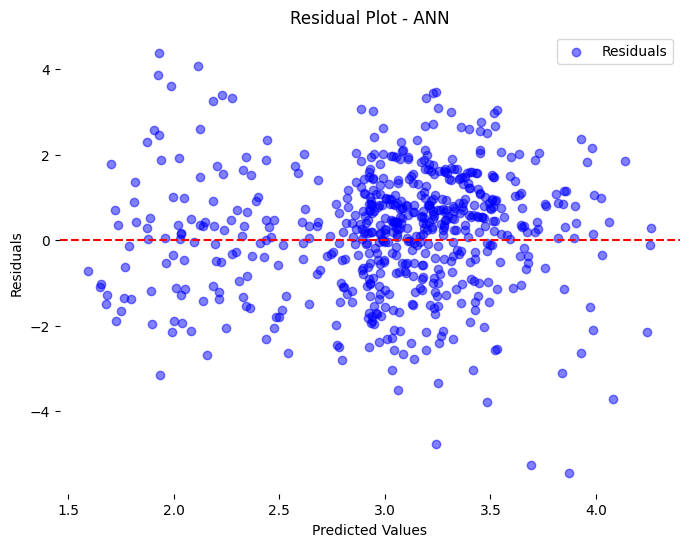

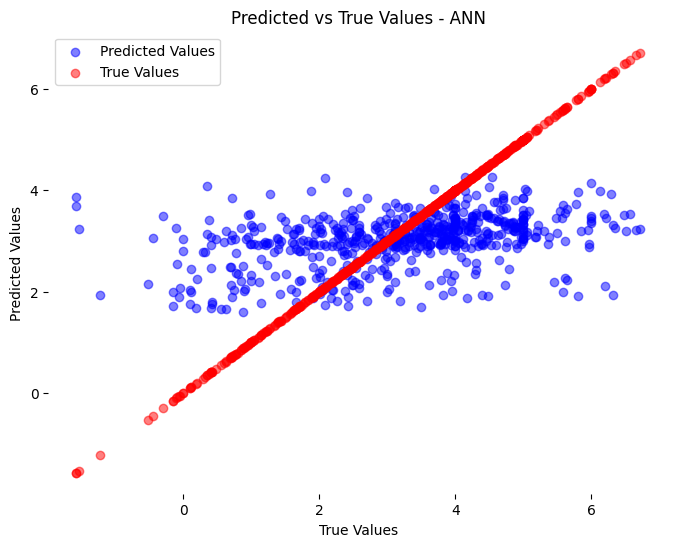

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Residual Plot for Best Model
def plot_residuals_best_model(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5, label='Residuals')
    plt.title(f"Residual Plot - {model_name}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.legend()
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box around plot
    plt.savefig(f"residual_plot_{model_name}.png")  # Save the plot
    plt.show()

# Plot Predicted vs True Values for Best Model
def plot_predicted_vs_true_best_model(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5, label='Predicted Values')
    plt.scatter(y_true, y_true, color='red', alpha=0.5, label='True Values')
    plt.title(f"Predicted vs True Values - {model_name}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(False)  # Remove grid
    plt.box(False)   # Remove box around plot
    plt.savefig(f"predicted_vs_true_values_plot_{model_name}.png")  # Save the plot
    plt.show()

best_model_name = best_model_info['model']
best_y_test_pred = bi_lstm_model.predict(X_test_lstm).flatten()  # Example usage, replace with actual best model's prediction

# Plot residual plot and predicted vs true values for the best model
plot_residuals_best_model(y_test, best_y_test_pred, best_model_name)
plot_predicted_vs_true_best_model(y_test, best_y_test_pred, best_model_name)


## Cross species evaluation

### Upload and prep for species dataset



In [91]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_humanIndependent_best_final.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_eel_best_final.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_mouse_best_final.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_cow_best_final.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_ray_best_final.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/RegressionModel_Independent_analysis/regression dataset/SupplementalFiles/species final dataset/df_mosquito_best_final.xlsx')

### Featurization of all species dataset
The code for descriptor calculation was adopted form blogpost by [@greglandrum](https://https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html)



In [63]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Function to calculate molecular descriptors for a given molecule
def getMolDescriptors(mol, missingVal=None):
    res = {}
    for nm, fn in Descriptors._descList:
        try:
            val = fn(mol)
        except:
            val = missingVal
        res[nm] = val
    return res

# Function to calculate descriptors for a dataset
def calculate_descriptors(df, smiles_column):
    descriptor_list = []
    for smiles in df[smiles_column]:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            descriptors = getMolDescriptors(mol, missingVal=None)
            descriptor_list.append(descriptors)
        else:
            descriptor_list.append({})
    return pd.DataFrame(descriptor_list)

# Calculate descriptors for each dataset
df_humanIndependent_features = calculate_descriptors(df_humanIndependent, 'cleanedMol')
df_eel_features = calculate_descriptors(df_eel, 'cleanedMol')
df_mouse_features = calculate_descriptors(df_mouse, 'cleanedMol')
df_cow_features = calculate_descriptors(df_cow, 'cleanedMol')
df_ray_features = calculate_descriptors(df_ray, 'cleanedMol')
df_mosquito_features = calculate_descriptors(df_mosquito, 'cleanedMol')

# Concatenate original datasets with their respective features
df_humanIndependent = pd.concat([df_humanIndependent, df_humanIndependent_features], axis=1)
df_eel = pd.concat([df_eel, df_eel_features], axis=1)
df_mouse = pd.concat([df_mouse, df_mouse_features], axis=1)
df_cow = pd.concat([df_cow, df_cow_features], axis=1)
df_ray = pd.concat([df_ray, df_ray_features], axis=1)
df_mosquito = pd.concat([df_mosquito, df_mosquito_features], axis=1)


In [64]:
best_column= feature1.columns.tolist()
optimized_column= feature_dataframe.columns.tolist()

### Best Model cross species evaluation





#### Dataset preparation for best model evaluation

In [92]:
df_humanIndependent_features_best=df_humanIndependent_features[optimized_column]
df_eel_features_best=df_eel_features[optimized_column]
df_mouse_features_best=df_mouse_features[optimized_column]
df_cow_features_best=df_cow_features[optimized_column]
df_ray_features_best=df_ray_features[optimized_column]
df_mosquito_features_best=df_mosquito_features[optimized_column]

In [93]:
df_eel_best_final=pd.merge(df_eel[['cleanedMol', 'IC50']], df_eel_features_best, left_index=True, right_index=True)
df_mouse_best_final=pd.merge(df_mouse[['cleanedMol', 'IC50']], df_mouse_features_best, left_index=True, right_index=True)
df_cow_best_final=pd.merge(df_cow[['cleanedMol', 'IC50']], df_cow_features_best, left_index=True, right_index=True)
df_ray_best_final=pd.merge(df_ray[['cleanedMol', 'IC50']], df_ray_features_best, left_index=True, right_index=True)
df_mosquito_best_final=pd.merge(df_mosquito[['cleanedMol', 'IC50']], df_mosquito_features_best, left_index=True, right_index=True)
df_humanIndependent_best_final=pd.merge(df_humanIndependent[['cleanedMol', 'IC50']], df_humanIndependent_features_best, left_index=True, right_index=True)

#### Dataset preparation for best model evaluation

In [94]:
X_train, X_test, y_train, y_test = train_test_split(feature_dataframe, target, test_size=0.20, random_state=42)


In [95]:
test_df_best = pd.merge(df[['cleanedMol', 'IC50']], X_test, left_index=True, right_index=True, how='inner')

#### Assigning negative pIC50 value to each datainstances

In [96]:
test_df_best.insert(0, 'pIC50', np.log10(test_df_best['IC50']))


In [97]:
test_df_best

,pIC50,cleanedMol,IC50,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,FpDensityMorgan1,FpDensityMorgan3,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
6,1.654177,Nc1c2c(nc3ccccc13)CCCC2,45.10,6.199769,0.953981,6.199769,0.953981,0.706488,1.066667,2.800000,...,0,0,0,0,0,0,0,0,0,0
8,0.748188,O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2,5.60,10.046839,-0.742861,10.046839,0.154546,0.356480,1.074074,2.740741,...,0,0,0,0,0,0,0,0,7,0
12,3.260071,COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1,1820.00,12.569376,0.024855,12.569376,0.024855,0.588089,0.769231,1.807692,...,0,0,0,0,0,0,0,0,0,0
14,4.000000,C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1,10000.00,10.758086,-0.298526,10.758086,0.298526,0.336849,1.375000,2.375000,...,1,0,0,0,0,0,0,0,0,0
17,5.636488,CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl,433000.00,12.623533,-0.003786,12.623533,0.003786,0.176201,0.848485,2.454545,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,3.008600,N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(C...,1020.00,8.987949,0.383797,8.987949,0.383797,0.283264,0.885714,2.085714,...,0,0,0,0,0,0,1,0,0,0
4064,3.939519,CNc1nc(NCCc2ccccc2)c2ccccc2n1,8700.00,4.517236,0.635103,4.517236,0.635103,0.751376,0.904762,2.476190,...,0,0,0,0,0,0,0,0,0,0
4070,4.268344,CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(...,18550.00,15.262323,-1.970036,15.262323,0.001837,0.227299,1.024390,2.073171,...,0,0,0,0,0,0,0,0,0,0
4071,1.899985,O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21,79.43,12.712094,-0.774097,12.712094,0.327584,0.631875,0.923077,2.384615,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# For df_humanIndependent_best_final
df_humanIndependent_best_final.insert(0, 'pIC50', np.log10(df_humanIndependent_best_final['IC50']))

# For df_eel_best_final
df_eel_best_final.insert(0, 'pIC50', np.log10(df_eel_best_final['IC50']))

# For df_mouse_best_final
df_mouse_best_final.insert(0, 'pIC50', -np.log10(df_mouse_best_final['IC50']))

# For df_cow_best_final
df_cow_best_final.insert(0, 'pIC50', -np.log10(df_cow_best_final['IC50']))

# For df_ray_best_final
df_ray_best_final.insert(0, 'pIC50', -np.log10(df_ray_best_final['IC50']))

# For df_mosquito_best_final
df_mosquito_best_final.insert(0, 'pIC50', -np.log10(df_mosquito_best_final['IC50']))


#### Evaulation of cross species dataset on best model

In [99]:
test_df_best

,pIC50,cleanedMol,IC50,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,FpDensityMorgan1,FpDensityMorgan3,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
6,1.654177,Nc1c2c(nc3ccccc13)CCCC2,45.10,6.199769,0.953981,6.199769,0.953981,0.706488,1.066667,2.800000,...,0,0,0,0,0,0,0,0,0,0
8,0.748188,O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2,5.60,10.046839,-0.742861,10.046839,0.154546,0.356480,1.074074,2.740741,...,0,0,0,0,0,0,0,0,7,0
12,3.260071,COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1,1820.00,12.569376,0.024855,12.569376,0.024855,0.588089,0.769231,1.807692,...,0,0,0,0,0,0,0,0,0,0
14,4.000000,C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1,10000.00,10.758086,-0.298526,10.758086,0.298526,0.336849,1.375000,2.375000,...,1,0,0,0,0,0,0,0,0,0
17,5.636488,CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl,433000.00,12.623533,-0.003786,12.623533,0.003786,0.176201,0.848485,2.454545,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,3.008600,N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(C...,1020.00,8.987949,0.383797,8.987949,0.383797,0.283264,0.885714,2.085714,...,0,0,0,0,0,0,1,0,0,0
4064,3.939519,CNc1nc(NCCc2ccccc2)c2ccccc2n1,8700.00,4.517236,0.635103,4.517236,0.635103,0.751376,0.904762,2.476190,...,0,0,0,0,0,0,0,0,0,0
4070,4.268344,CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(...,18550.00,15.262323,-1.970036,15.262323,0.001837,0.227299,1.024390,2.073171,...,0,0,0,0,0,0,0,0,0,0
4071,1.899985,O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21,79.43,12.712094,-0.774097,12.712094,0.327584,0.631875,0.923077,2.384615,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_df_best,
    'Human Independent': df_humanIndependent_best_final,
    'Eel': df_eel_best_final,
    'Mouse': df_mouse_best_final,
    'Cow': df_cow_best_final,
    'Ray': df_ray_best_final,
    'Mosquito': df_mosquito_best_final
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Iterate through each dataset
for species, data in datasets.items():
    # Extract features and target variable
    X = data.loc[:, 'MaxEStateIndex':]
    y = data['pIC50']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Debug: Print shape of scaled features and target
    print(f"Species: {species}")
    print(f"Shape of X_scaled: {X_scaled.shape}")
    print(f"Shape of y: {y.shape}")

    try:
        # Check if the input shape matches the model's expected input shape
        model_input_shape = best_model.input_shape
        if len(model_input_shape) == 2 and model_input_shape[1] != X_scaled.shape[1]:
            raise ValueError(f"Model expects input shape {model_input_shape[1]}, but got {X_scaled.shape[1]} for {species} dataset.")

        # Predict on the test set using the best model
        y_pred = best_model.predict(X_scaled).reshape(-1)

        # Calculate evaluation metrics
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Store metrics in the evaluation_metrics dictionary
        evaluation_metrics[species] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }

        # Plot y_pred vs. y_true
        plt.figure(figsize=(8, 6))
        plt.scatter(y, y_pred, color='blue', alpha=0.7, label=f'RMSE: {rmse:.2f}, R²: {r2:.2f}')
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
        plt.xlabel('True Values', fontsize=14)
        plt.ylabel('Predicted Values', fontsize=14)
        plt.title(f'True vs. Predicted Values for {species}', fontsize=16)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.legend(loc='upper left', fontsize=12)
        plt.grid(False)
        plt.box(False)
        plt.tight_layout()
        plt.savefig(f'y_pred_vs_y_true_{species}.png', dpi=300)
        plt.close()

        # Plot residual plot
        residuals = y - y_pred
        plt.figure(figsize=(8, 6))
        sns.residplot(x=y, y=residuals, lowess=True, color="blue", scatter_kws={'alpha': 0.7, 's': 60})
        plt.xlabel('True Values', fontsize=14)
        plt.ylabel('Residuals', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(f'Residual Plot for {species}')
        plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
        plt.grid(False)
        plt.box(False)
        plt.tight_layout()
        plt.savefig(f'residual_plot_{species}.png', dpi=300)
        plt.close()

    except Exception as e:
        print(f"Error predicting for {species}: {e}")

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_best.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


Species: Human Test
Shape of X_scaled: (816, 138)
Shape of y: (816,)
26/26 [==============================] - 0s 5ms/step
Species: Human Independent
Shape of X_scaled: (208, 138)
Shape of y: (208,)
7/7 [==============================] - 0s 5ms/step
Species: Eel
Shape of X_scaled: (6210, 138)
Shape of y: (6210,)
195/195 [==============================] - 0s 2ms/step
Species: Mouse
Shape of X_scaled: (523, 138)
Shape of y: (523,)
17/17 [==============================] - 0s 2ms/step
Species: Cow
Shape of X_scaled: (600, 138)
Shape of y: (600,)
19/19 [==============================] - 0s 2ms/step
Species: Ray
Shape of X_scaled: (420, 138)
Shape of y: (420,)
14/14 [==============================] - 0s 2ms/step
Species: Mosquito
Shape of X_scaled: (139, 138)
Shape of y: (139,)
5/5 [==============================] - 0s 3ms/step
Evaluation for Human Test dataset:
MSE: 0.8993
RMSE: 0.9483
MAE: 0.7465
R2: 0.6346
Evaluation for Human Independent dataset:
MSE: 0.6072
RMSE: 0.7792
MAE: 0.6204
R2: 0

5/5 [==============================] - 0s 3ms/step


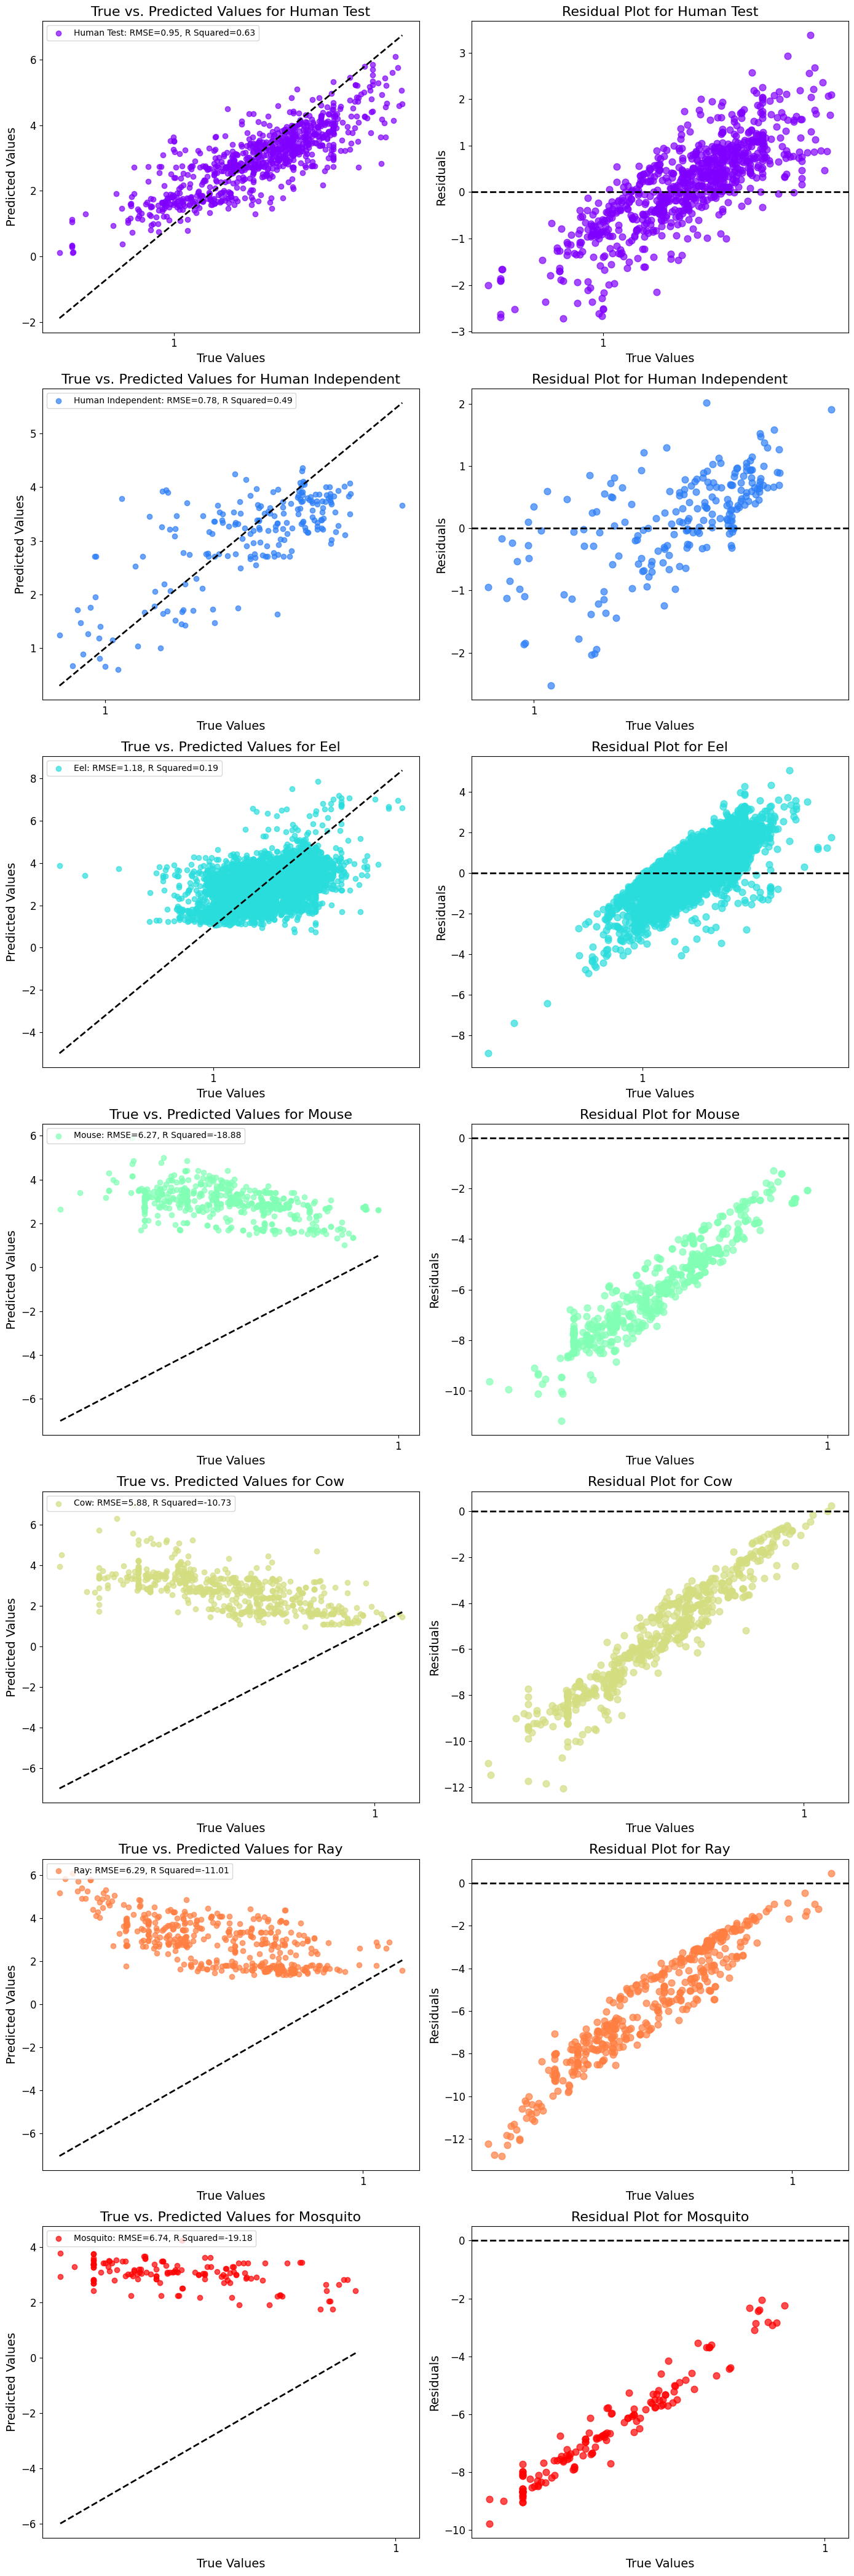

Evaluation for Human Test dataset:
MSE: 0.8993
RMSE: 0.9483
MAE: 0.7465
R2: 0.6346
Evaluation for Human Independent dataset:
MSE: 0.6072
RMSE: 0.7792
MAE: 0.6204
R2: 0.4930
Evaluation for Eel dataset:
MSE: 1.4037
RMSE: 1.1848
MAE: 0.9339
R2: 0.1852
Evaluation for Mouse dataset:
MSE: 39.2643
RMSE: 6.2661
MAE: 5.9923
R2: -18.8769
Evaluation for Cow dataset:
MSE: 34.5764
RMSE: 5.8802
MAE: 5.3716
R2: -10.7275
Evaluation for Ray dataset:
MSE: 39.5425
RMSE: 6.2883
MAE: 5.7166
R2: -11.0084
Evaluation for Mosquito dataset:
MSE: 45.4310
RMSE: 6.7403
MAE: 6.5074
R2: -19.1850

Combined Evaluation Metrics:
                         MSE      RMSE       MAE         R2
Human Test          0.899278  0.948303  0.746476   0.634610
Human Independent   0.607179  0.779217  0.620449   0.492959
Eel                 1.403747  1.184798  0.933915   0.185210
Mouse              39.264267  6.266121  5.992257 -18.876939
Cow                34.576431  5.880173  5.371634 -10.727507
Ray                39.542532  6.288285

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
datasets = {
    'Human Test': test_df_best,
    'Human Independent': df_humanIndependent_best_final,
    'Eel': df_eel_best_final,
    'Mouse': df_mouse_best_final,
    'Cow': df_cow_best_final,
    'Ray': df_ray_best_final,
    'Mosquito': df_mosquito_best_final
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
fig, axs = plt.subplots(nrows=len(datasets), ncols=2, figsize=(14, 6 * len(datasets)))

colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(datasets))))

for i, (species, data) in enumerate(datasets.items()):
    # Extract features and target variable
    X = data.loc[:, 'MaxEStateIndex':]
    y = data['pIC50']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X_scaled).ravel()

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    color = next(colors)
    axs[i, 0].scatter(y, y_pred, color=color, alpha=0.7, label=f'{species}: RMSE={rmse:.2f}, R Squared={r2:.2f}')
    axs[i, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # No label for fit line
    axs[i, 0].set_xlabel('True Values', fontsize=14)
    axs[i, 0].set_ylabel('Predicted Values', fontsize=14)
    axs[i, 0].set_title(f'True vs. Predicted Values for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    axs[i, 0].tick_params(axis='both', which='major', labelsize=12)
    axs[i, 0].legend(loc='upper left', fontsize=10)  # Moved the label to the far-left corner
    axs[i, 0].grid(False)  # Remove grid
    axs[i, 0].boxplot([], showmeans=False)   # Remove box

    # Plot residual plot
    residuals = y - y_pred
    axs[i, 1].scatter(y, residuals, color=color, alpha=0.7, s=60)
    axs[i, 1].axhline(y=0, color='k', linestyle='--', linewidth=2)
    axs[i, 1].set_xlabel('True Values', fontsize=14)
    axs[i, 1].set_ylabel('Residuals', fontsize=14)
    axs[i, 1].set_title(f'Residual Plot for {species}', fontsize=16)  # Removed R-squared and RMSE from the title
    axs[i, 1].tick_params(axis='both', which='major', labelsize=12)
    axs[i, 1].grid(False)  # Remove grid
    axs[i, 1].boxplot([], showmeans=False)   # Remove box

plt.tight_layout()
plt.savefig('all_species_plots.png', dpi=300)
plt.show()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_best.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)


5/5 [==============================] - 0s 2ms/step


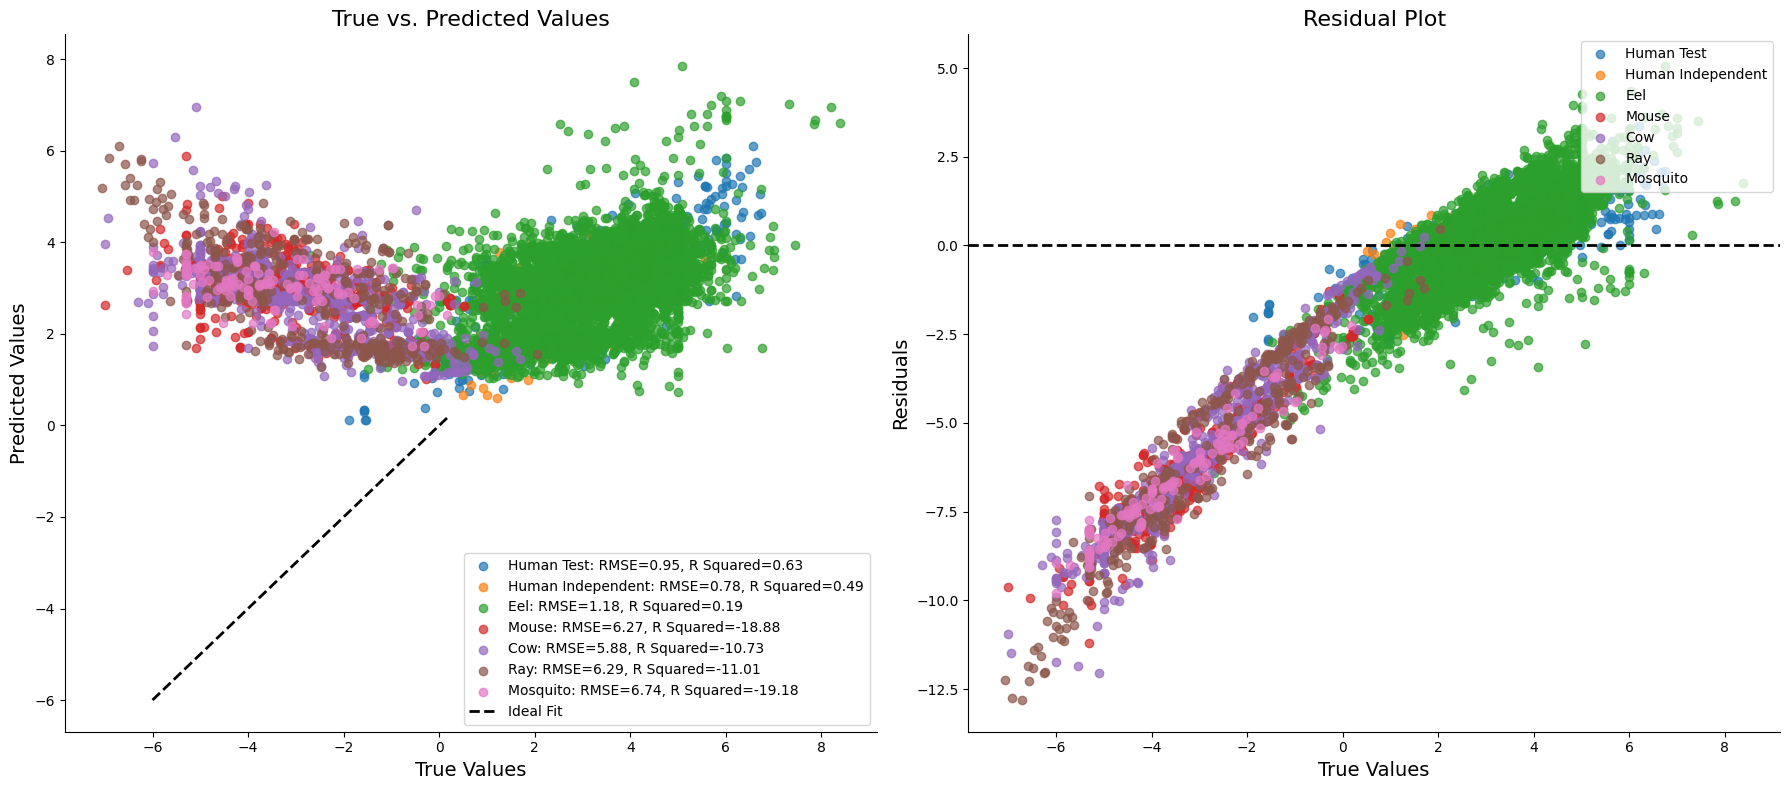

Evaluation for Human Test dataset:
MSE: 0.8993
RMSE: 0.9483
MAE: 0.7465
R2: 0.6346
Evaluation for Human Independent dataset:
MSE: 0.6072
RMSE: 0.7792
MAE: 0.6204
R2: 0.4930
Evaluation for Eel dataset:
MSE: 1.4037
RMSE: 1.1848
MAE: 0.9339
R2: 0.1852
Evaluation for Mouse dataset:
MSE: 39.2643
RMSE: 6.2661
MAE: 5.9923
R2: -18.8769
Evaluation for Cow dataset:
MSE: 34.5764
RMSE: 5.8802
MAE: 5.3716
R2: -10.7275
Evaluation for Ray dataset:
MSE: 39.5425
RMSE: 6.2883
MAE: 5.7166
R2: -11.0084
Evaluation for Mosquito dataset:
MSE: 45.4310
RMSE: 6.7403
MAE: 6.5074
R2: -19.1850

Combined Evaluation Metrics:
                         MSE      RMSE       MAE         R2
Human Test          0.899278  0.948303  0.746476   0.634610
Human Independent   0.607179  0.779217  0.620449   0.492959
Eel                 1.403747  1.184798  0.933915   0.185210
Mouse              39.264267  6.266121  5.992257 -18.876939
Cow                34.576431  5.880173  5.371634 -10.727507
Ray                39.542532  6.288285

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

datasets = {
    'Human Test': test_df_best,
    'Human Independent': df_humanIndependent_best_final,
    'Eel': df_eel_best_final,
    'Mouse': df_mouse_best_final,
    'Cow': df_cow_best_final,
    'Ray': df_ray_best_final,
    'Mosquito': df_mosquito_best_final
}

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Set up the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot y_pred vs. y_true
ax = axs[0]
for species, data in datasets.items():
        # Extract features and target variable
    X = data.loc[:, 'MaxEStateIndex':]
    y = data['pIC50']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X_scaled).ravel()
    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Store metrics in the evaluation_metrics dictionary
    evaluation_metrics[species] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    # Plot y_pred vs. y_true
    ax.scatter(y, y_pred, label=f'{species}: RMSE={rmse:.2f}, R Squared={r2:.2f}', alpha=0.7)

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')  # No label for fit line
ax.set_xlabel('True Values', fontsize=14)
ax.set_ylabel('Predicted Values', fontsize=14)
ax.set_title('True vs. Predicted Values', fontsize=16)
ax.legend(loc='lower right', fontsize=10)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot residual plot
ax = axs[1]
for species, data in datasets.items():
    X = data.loc[:, 'MaxEStateIndex':]
    y = data['pIC50']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Predict on the test set using the pre-fitted model
    y_pred = best_model.predict(X_scaled).ravel()

    # Plot residual plot
    residuals = y - y_pred
    ax.scatter(y, residuals, label=f'{species}', alpha=0.7)

ax.axhline(y=0, color='k', linestyle='--', linewidth=2)
ax.set_xlabel('True Values', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax.set_title('Residual Plot', fontsize=16)
ax.legend(loc='upper right', fontsize=10)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('all_species_plots.png', dpi=300)
plt.show()

# Create a list to store all evaluation metrics dataframes
all_metrics_dfs = []

for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    # Create a dataframe for each species' metrics
    metrics_df = pd.DataFrame(metrics, index=[species])
    all_metrics_dfs.append(metrics_df)

# Concatenate all metrics dataframes into a single dataframe
all_metrics_combined = pd.concat(all_metrics_dfs)

# Save the combined metrics dataframe to an Excel file
all_metrics_combined.to_excel('evaluation_metrics_combined_best.xlsx')

# Display the combined metrics dataframe
print("\nCombined Evaluation Metrics:")
print(all_metrics_combined)
